In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import Counter
import seaborn as sns
import sys
import numpy as np

csv.field_size_limit(sys.maxsize)

data = []
with open('C:\\Users\\zalma\\B\\games.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

header = data[0]
body = data[1:]

if 'DiscountDLC count' in header:
    index = header.index('DiscountDLC count')
    header.pop(index)
    header.insert(index, 'Discount')
    header.insert(index + 1, 'DLC count')


df = pd.DataFrame(body, columns=header)
display(df.head())
print("Rekordok száma:", df.shape[0])
print("Attribútumok száma:", df.shape[1])

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.0,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Rekordok száma: 111452
Attribútumok száma: 40


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu', 'required_age', 'price', 'discount', 'dlc_count', 'about_the_game', 'supported_languages', 'full_audio_languages', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score', 'positive', 'negative', 'score_rank', 'achievements', 'recommendations', 'notes', 'average_playtime_forever', 'average_playtime_two_weeks', 'median_playtime_forever', 'median_playtime_two_weeks', 'developers', 'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies']


### Játékok átlagos ára évenként a Steamen

Ez a szakasz a játékok átlagos árának alakulását vizsgálja évenként a Steam platformon. A kód kiszámolja az átlagárat minden évre, majd egy vonaldiagramon jeleníti meg az eredményt, hogy láthatóvá váljon az árak időbeli trendje.

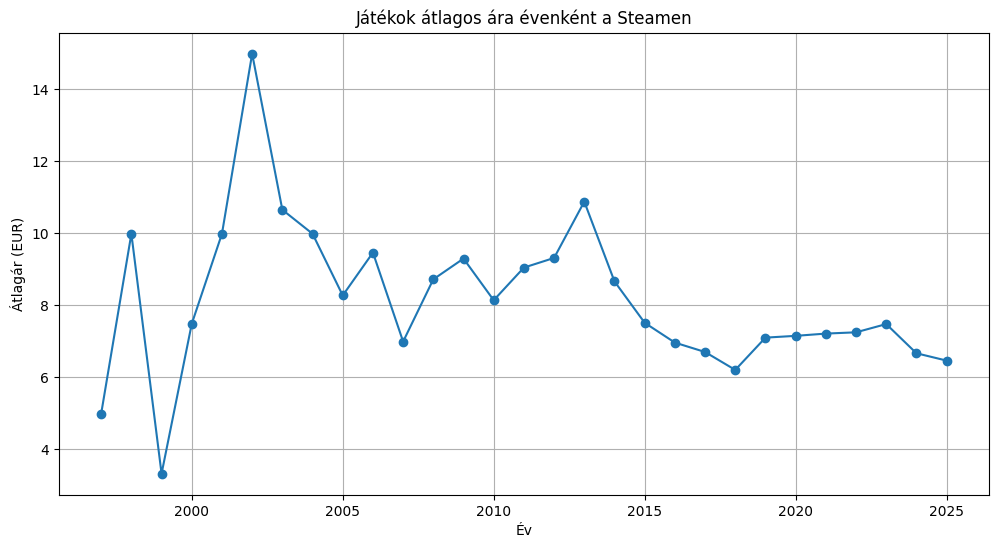

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['price'] = pd.to_numeric(df['price'], errors='coerce')

year_price = df.groupby('year')['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(year_price.index, year_price.values, marker='o')
plt.title("Játékok átlagos ára évenként a Steamen")
plt.xlabel("Év")
plt.ylabel("Átlagár (EUR)")
plt.grid(True)
plt.show()

### Játék megjelenések száma évenként és hónaponként (Hőtérkép)

Ez a szakasz a játékok megjelenésének mintázatát vizsgálja évenként és hónaponként egy hőtérkép segítségével. A kód összesíti a megjelenések számát minden hónapban az egyes években, majd a hőtérkép vizuálisan megjeleníti a sűrűbben és ritkábban előforduló megjelenési időszakokat.

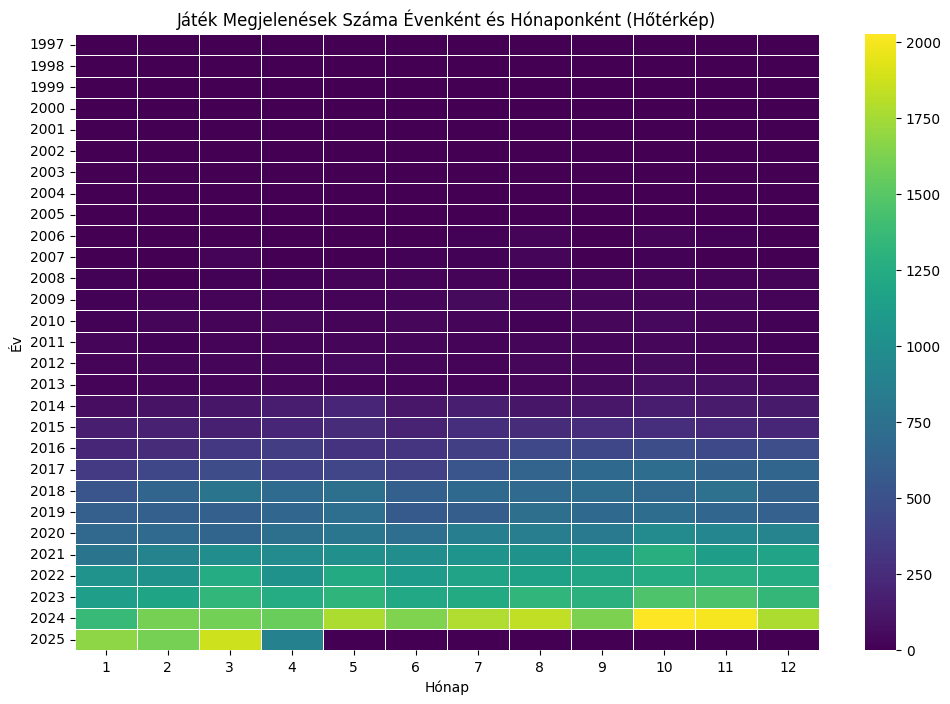

In [5]:
df['month'] = df['release_date'].dt.month
releases_heatmap_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(releases_heatmap_data, cmap="viridis", fmt="d", linewidths=.5)
plt.title('Játék Megjelenések Száma Évenként és Hónaponként (Hőtérkép)')
plt.xlabel('Hónap')
plt.ylabel('Év')

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
ax.set_yticks(np.arange(len(releases_heatmap_data.index)) + 0.5)
ax.set_yticklabels(releases_heatmap_data.index.astype(int))

ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
ax.set_xticks(np.arange(len(releases_heatmap_data.columns)) + 0.5)
ax.set_xticklabels(releases_heatmap_data.columns.astype(int))

plt.show()

### Játék árak eloszlása

Ez a szakasz a játékok árának eloszlását vizsgálja a Steam platformon. A kód egy hisztogramot készít, amely bemutatja, milyen gyakran fordulnak elő bizonyos ártartományok a játékok között.

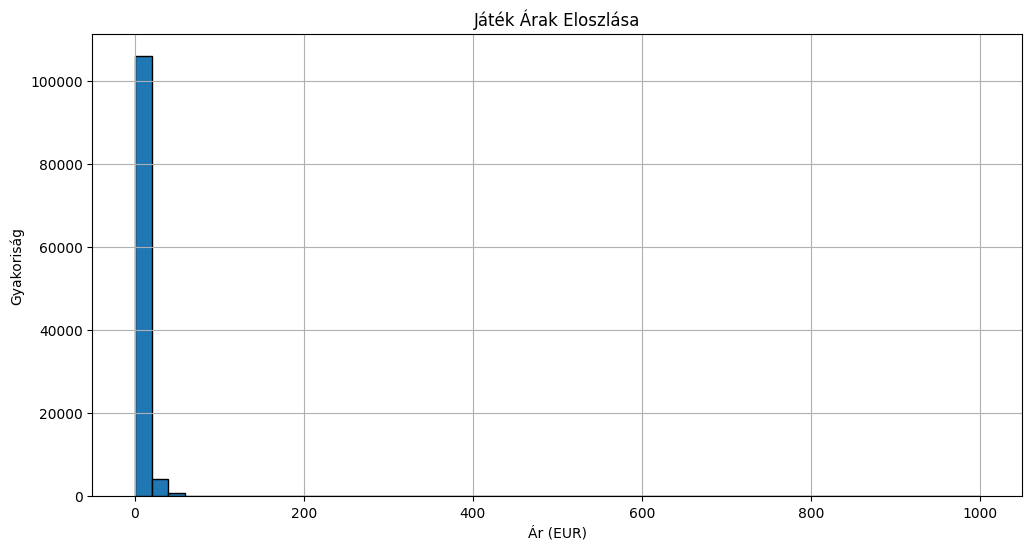

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

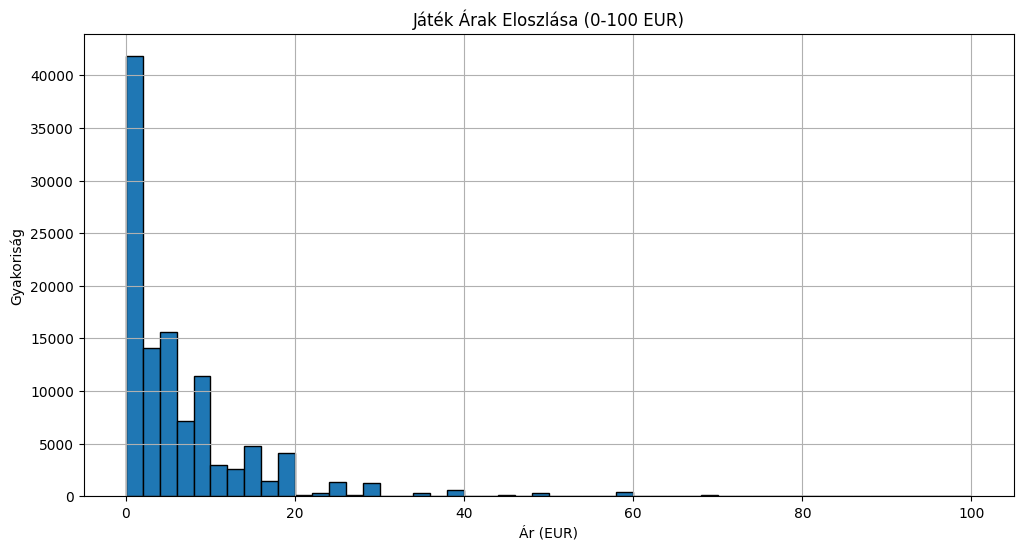

In [7]:
plt.figure(figsize=(12, 6))
df_filtered_price = df[(df['price'] >= 0) & (df['price'] <= 100)]
plt.hist(df_filtered_price['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása (0-100 EUR)')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

### Játékok száma évenként

Ez a szakasz a Steam-en megjelenő játékok számának alakulását vizsgálja évenként. A kód megszámolja a játékok számát minden évre, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a megjelenések számának időbeli trendje.

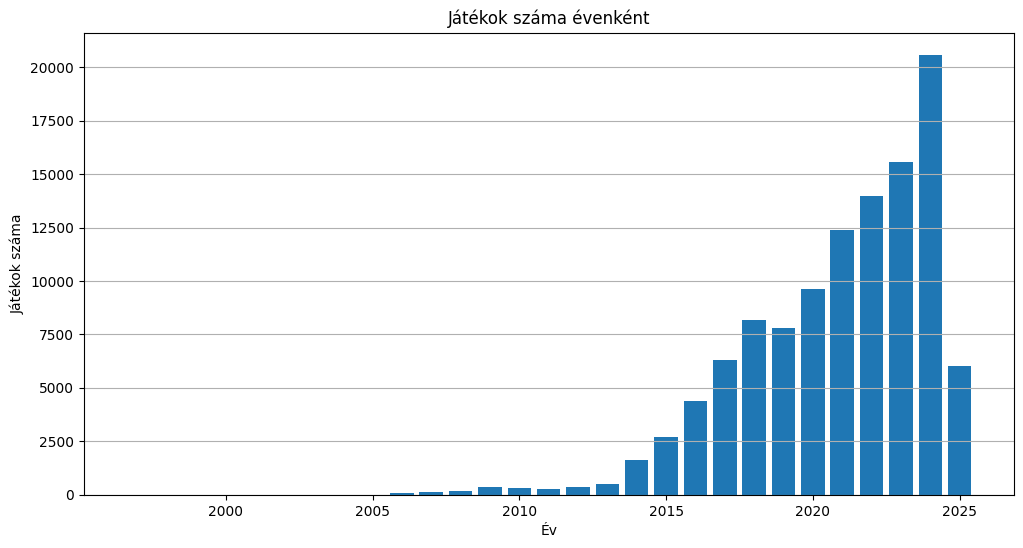

In [8]:
if 'year' not in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Játékok száma évenként')
plt.xlabel('Év')
plt.ylabel('Játékok száma')
plt.grid(axis='y')
plt.show()

### Top 20 Játék Műfaj Száma

Ez a szakasz a leggyakoribb játék műfajokat vizsgálja a Steam-en. A kód kinyeri az összes műfajt a datasetből, megszámolja az egyes műfajok előfordulását, majd egy oszlopdiagramon megjeleníti a 20 leggyakoribb műfajt.

<Figure size 1200x800 with 0 Axes>

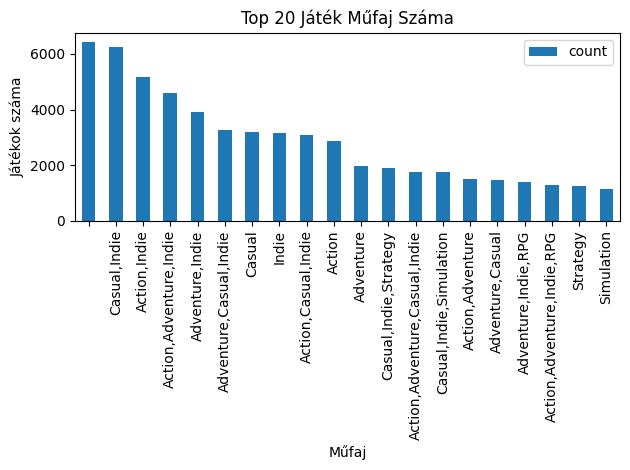

In [9]:
genres_list = df['genres'].str.split(';').sum()
genre_counts = Counter(genres_list)

genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

top_n = 20
plt.figure(figsize=(12, 8))
genre_df.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Játék Műfaj Száma')
plt.xlabel('Műfaj')
plt.ylabel('Játékok száma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Játékok száma az ajánlott életkor szerint

Ez a szakasz a játékok számának eloszlását vizsgálja az ajánlott életkor szerint a Steam-en. A kód megszámolja a játékok számát minden korosztályra, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a korosztály szerinti megoszlás.

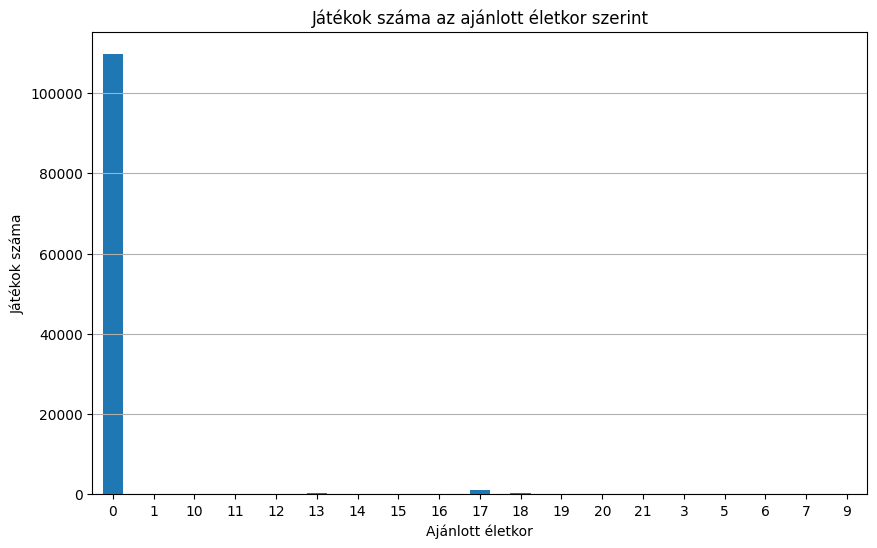

In [10]:
age_counts = df['required_age'].value_counts().sort_index()

age_counts = age_counts.rename(index={0: 'Nincs korhatár'})

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Játékok száma az ajánlott életkor szerint')
plt.xlabel('Ajánlott életkor')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Játékok száma támogatott platformonként

Ez a szakasz a játékok platformtámogatását vizsgálja a Steam-en. A kód megszámolja, hány játék érhető el Windows, Mac és Linux platformon, majd egy oszlopdiagramon megjeleníti az eredményt, hogy láthatóvá váljon a platform szerinti megoszlás.

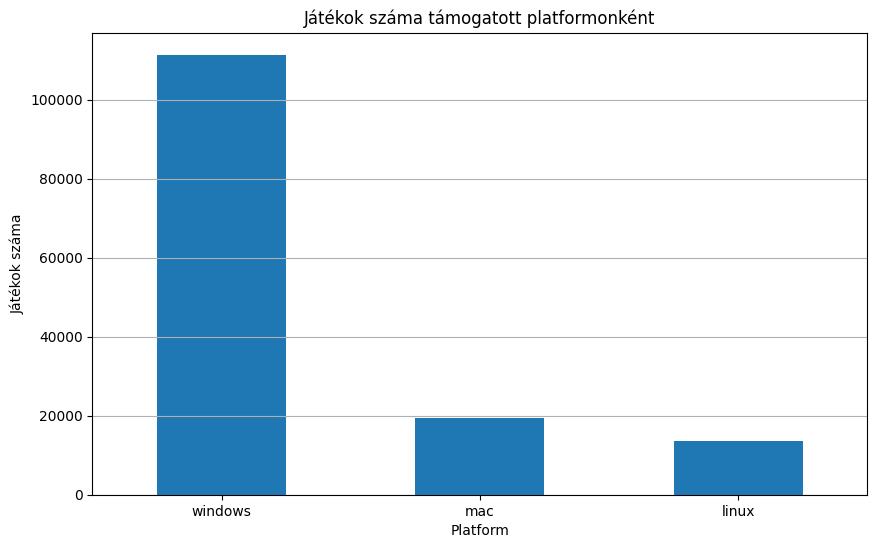

In [11]:
platforms = ['windows', 'mac', 'linux']

platform_counts = {
    platform: df[platform].astype(str).str.lower().map({'true': 1, 'false': 0}).sum()
    for platform in platforms
}

platforms_series = pd.Series(platform_counts, dtype=int)

plt.figure(figsize=(10, 6))
platforms_series.plot(kind='bar')
plt.title('Játékok száma támogatott platformonként')
plt.xlabel('Platform')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Metacritic értékek az ár függvényében

Ez a szakasz a játékok Metacritic értéke és az ár közötti kapcsolatot vizsgálja a Steam-en. A kód egy szórást diagramon (scatterplot) ábrázolja a Metacritic értéket az ár függvényében, hogy láthatóvá váljon, van-e összefüggés a kettő között.

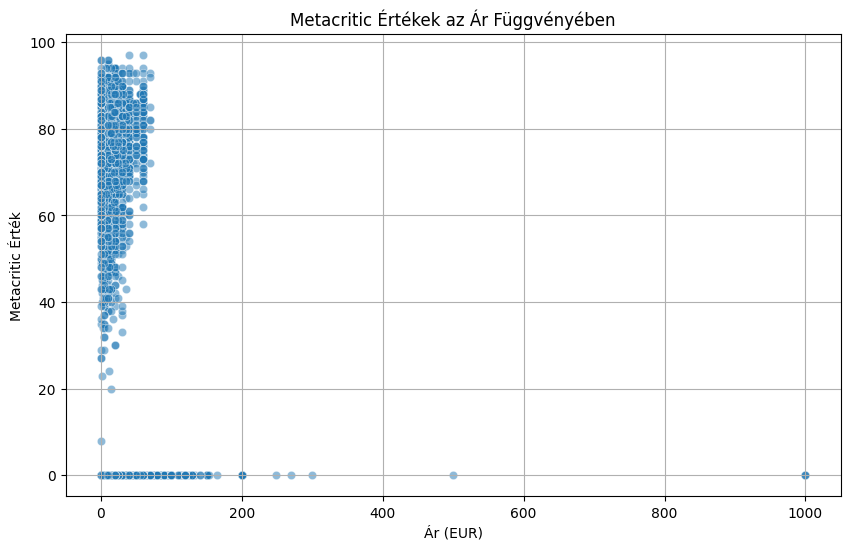

In [12]:
df['metacritic_score'] = pd.to_numeric(df['metacritic_score'], errors='coerce')

df_filtered = df.dropna(subset=['metacritic_score', 'price'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='price', y='metacritic_score', alpha=0.5)
plt.title('Metacritic Értékek az Ár Függvényében')
plt.xlabel('Ár (EUR)')
plt.ylabel('Metacritic Érték')
plt.grid(True)
plt.show()

### Metacritic értékek a kiadási év függvényében

Ez a szakasz a játékok Metacritic értéke és a kiadási év közötti kapcsolatot vizsgálja a Steam-en. A kód egy szórást diagramon (scatterplot) ábrázolja a Metacritic értéket a kiadási év függvényében, hogy láthatóvá váljon, van-e összefüggés a kettő között.

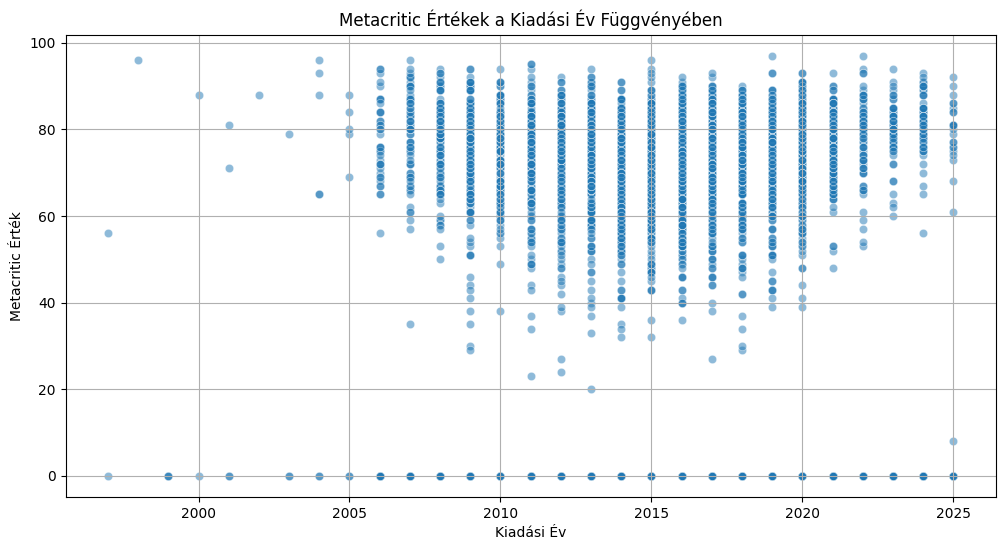

In [13]:
df_filtered = df.dropna(subset=['metacritic_score', 'year'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='year', y='metacritic_score', alpha=0.5)
plt.title('Metacritic Értékek a Kiadási Év Függvényében')
plt.xlabel('Kiadási Év')
plt.ylabel('Metacritic Érték')
plt.grid(True)
plt.show()

### Metacritic értékek az ajánlott életkor függvényében

Ez a szakasz a játékok Metacritic értéke és az ajánlott életkor közötti kapcsolatot vizsgálja a Steam-en. A kód egy dobozdiagramon (boxplot) ábrázolja a Metacritic értéket az ajánlott életkor függvényében, hogy láthatóvá váljon, hogyan oszlik meg a Metacritic érték a különböző korosztályokban.

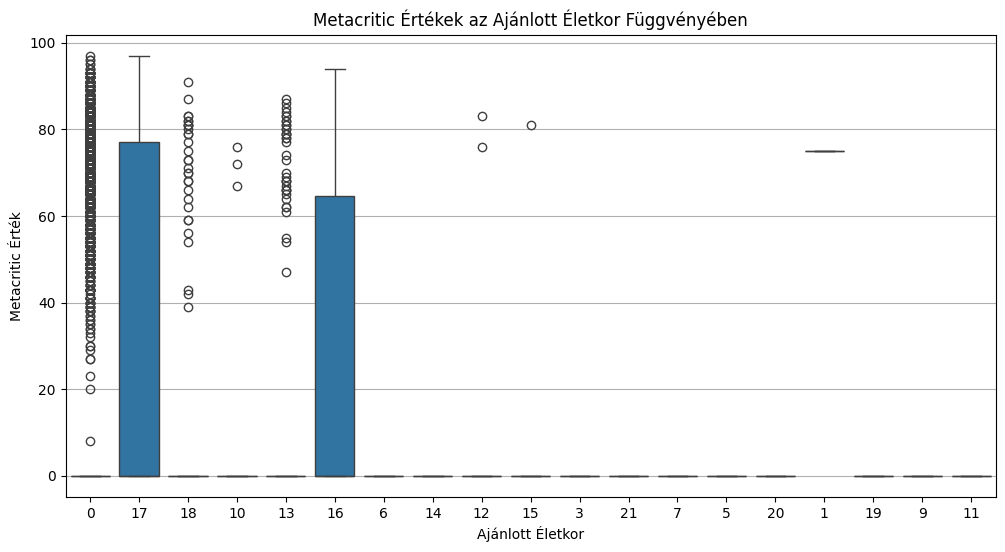

In [14]:
df_filtered = df.dropna(subset=['metacritic_score'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='required_age', y='metacritic_score')
plt.title('Metacritic Értékek az Ajánlott Életkor Függvényében')
plt.xlabel('Ajánlott Életkor')
plt.ylabel('Metacritic Érték')
plt.grid(axis='y')
plt.show()